# Support Vector Machine Student churn Classifier

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv("C:/Users/HP/Downloads/KK.csv")
df.head()

,S. NO.,GENDER,LOCALITY,EDUCATION,FACULTY,DEPARTMENT,STUDENT TYPE,Q1,Q2,Q3,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Unnamed: 34
0,1,0,0,1,Science,Mathematics and Statistics,1,3,4,3,...,1,0,3,3,3,0,2,1,2,NaN
1,2,1,0,1,Science,Mathematics and Statistics,1,2,2,3,...,1,1,1,1,1,1,2,2,2,NaN
2,3,0,0,1,Science,Mathematics and Statistics,1,3,3,2,...,2,1,3,2,3,0,2,1,2,NaN
3,4,0,0,0,Science,Chemistry,1,2,2,2,...,2,1,1,1,1,1,1,1,1,NaN
4,5,0,0,0,Science,Chemistry,0,2,2,2,...,2,1,1,1,1,1,1,1,1,NaN


In [23]:
df=df.drop(columns=['Unnamed: 34'],axis=1)
df.head(2)

,S. NO.,GENDER,LOCALITY,EDUCATION,FACULTY,DEPARTMENT,STUDENT TYPE,Q1,Q2,Q3,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,1,0,0,1,Science,Mathematics and Statistics,1,3,4,3,...,2,1,0,3,3,3,0,2,1,2
1,2,1,0,1,Science,Mathematics and Statistics,1,2,2,3,...,1,1,1,1,1,1,1,2,2,2


In [24]:
df=df.drop(columns=['S. NO.'],axis=1)
df.head(2)

,GENDER,LOCALITY,EDUCATION,FACULTY,DEPARTMENT,STUDENT TYPE,Q1,Q2,Q3,Q4,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
0,0,0,1,Science,Mathematics and Statistics,1,3,4,3,4,...,2,1,0,3,3,3,0,2,1,2
1,1,0,1,Science,Mathematics and Statistics,1,2,2,3,4,...,1,1,1,1,1,1,1,2,2,2


In [25]:
df.keys()

Index(['GENDER', 'LOCALITY', 'EDUCATION', 'FACULTY', 'DEPARTMENT',
       'STUDENT TYPE', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27'],
      dtype='object')

In [26]:
df.isnull().any()

GENDER          False
LOCALITY        False
EDUCATION       False
FACULTY         False
DEPARTMENT      False
STUDENT TYPE    False
Q1              False
Q2              False
Q3              False
Q4              False
Q5              False
Q6              False
Q7              False
Q8              False
Q9              False
Q10             False
Q11             False
Q12             False
Q13             False
Q14             False
Q15             False
Q16             False
Q17             False
Q18             False
Q19             False
Q20             False
Q21             False
Q22             False
Q23             False
Q24             False
Q25             False
Q26             False
Q27             False
dtype: bool

In [27]:
df['DEPARTMENT'].value_counts()

Commerce and Business Management    149
Computer Applications               132
Pharmacy                            100
IIAST                                97
Law                                  64
Biosciences                          59
Mathematics and Statistics           55
MBBS                                 55
Education                            40
Mechanical Engineering               35
Paramedical Sciences                 35
CSE                                  34
Physiotherapy                        28
Chemistry                            24
Humanities and Social Sciences       19
Electrical Engineering               16
Civil Engineering                    13
Automobile Engineering               13
Architecture                          7
Bioengineering                        5
IINSR                                 5
Medical Biochemistry                  4
Optometry                             3
Physics                               3
Biotechnology                         2


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GENDER        1000 non-null   int64 
 1   LOCALITY      1000 non-null   int64 
 2   EDUCATION     1000 non-null   int64 
 3   FACULTY       1000 non-null   object
 4   DEPARTMENT    1000 non-null   object
 5   STUDENT TYPE  1000 non-null   int64 
 6   Q1            1000 non-null   int64 
 7   Q2            1000 non-null   int64 
 8   Q3            1000 non-null   int64 
 9   Q4            1000 non-null   int64 
 10  Q5            1000 non-null   int64 
 11  Q6            1000 non-null   int64 
 12  Q7            1000 non-null   int64 
 13  Q8            1000 non-null   int64 
 14  Q9            1000 non-null   int64 
 15  Q10           1000 non-null   int64 
 16  Q11           1000 non-null   int64 
 17  Q12           1000 non-null   int64 
 18  Q13           1000 non-null   int64 
 19  Q14    

In [29]:
df.describe()

,GENDER,LOCALITY,EDUCATION,STUDENT TYPE,Q1,Q2,Q3,Q4,Q5,Q6,...,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.392000,0.268000,0.113000,0.705000,2.446000,2.614000,2.718000,3.073000,1.559000,2.069000,...,1.717000,1.928000,0.657000,1.828000,2.126000,2.177000,0.897000,1.762000,1.662000,1.696000
std,0.492523,0.443139,0.316751,0.456271,1.079003,1.102824,1.118806,1.244677,0.788124,0.884885,...,0.582452,0.804651,0.474949,0.879312,1.037883,1.083903,0.760901,0.426072,0.473265,0.460213
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,3.000000,1.000000,2.000000,...,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000
75%,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,4.000000,4.000000,2.000000,3.000000,...,2.000000,2.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000
max,2.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000


In [30]:
df['FACULTY'].value_counts()

Engineering and IT                     250
Commerce and Management                149
Science                                141
Health and Medical Sciences            125
Pharmacy                               100
Agricultural Science and Technology     97
Law                                     64
Education                               40
Humanities and Social Sciences          21
Architecture, Planning and Design        7
Nursing                                  5
Journalism and Mass Communication        1
Name: FACULTY, dtype: int64

#  Convert the categorical value to numerical

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
categorical_columns = ['FACULTY', 'DEPARTMENT']
encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[categorical_columns])
encoded_features_array= encoded_features.toarray()

encoded_features_df=pd.DataFrame(encoded_features_array,columns=encoder.get_feature_names_out(categorical_columns))
df.drop(columns=categorical_columns,inplace=True)
X=pd.concat([df, encoded_features_df],axis=1)

# Heatmap

In [33]:
corr=df.corr()

<AxesSubplot:>

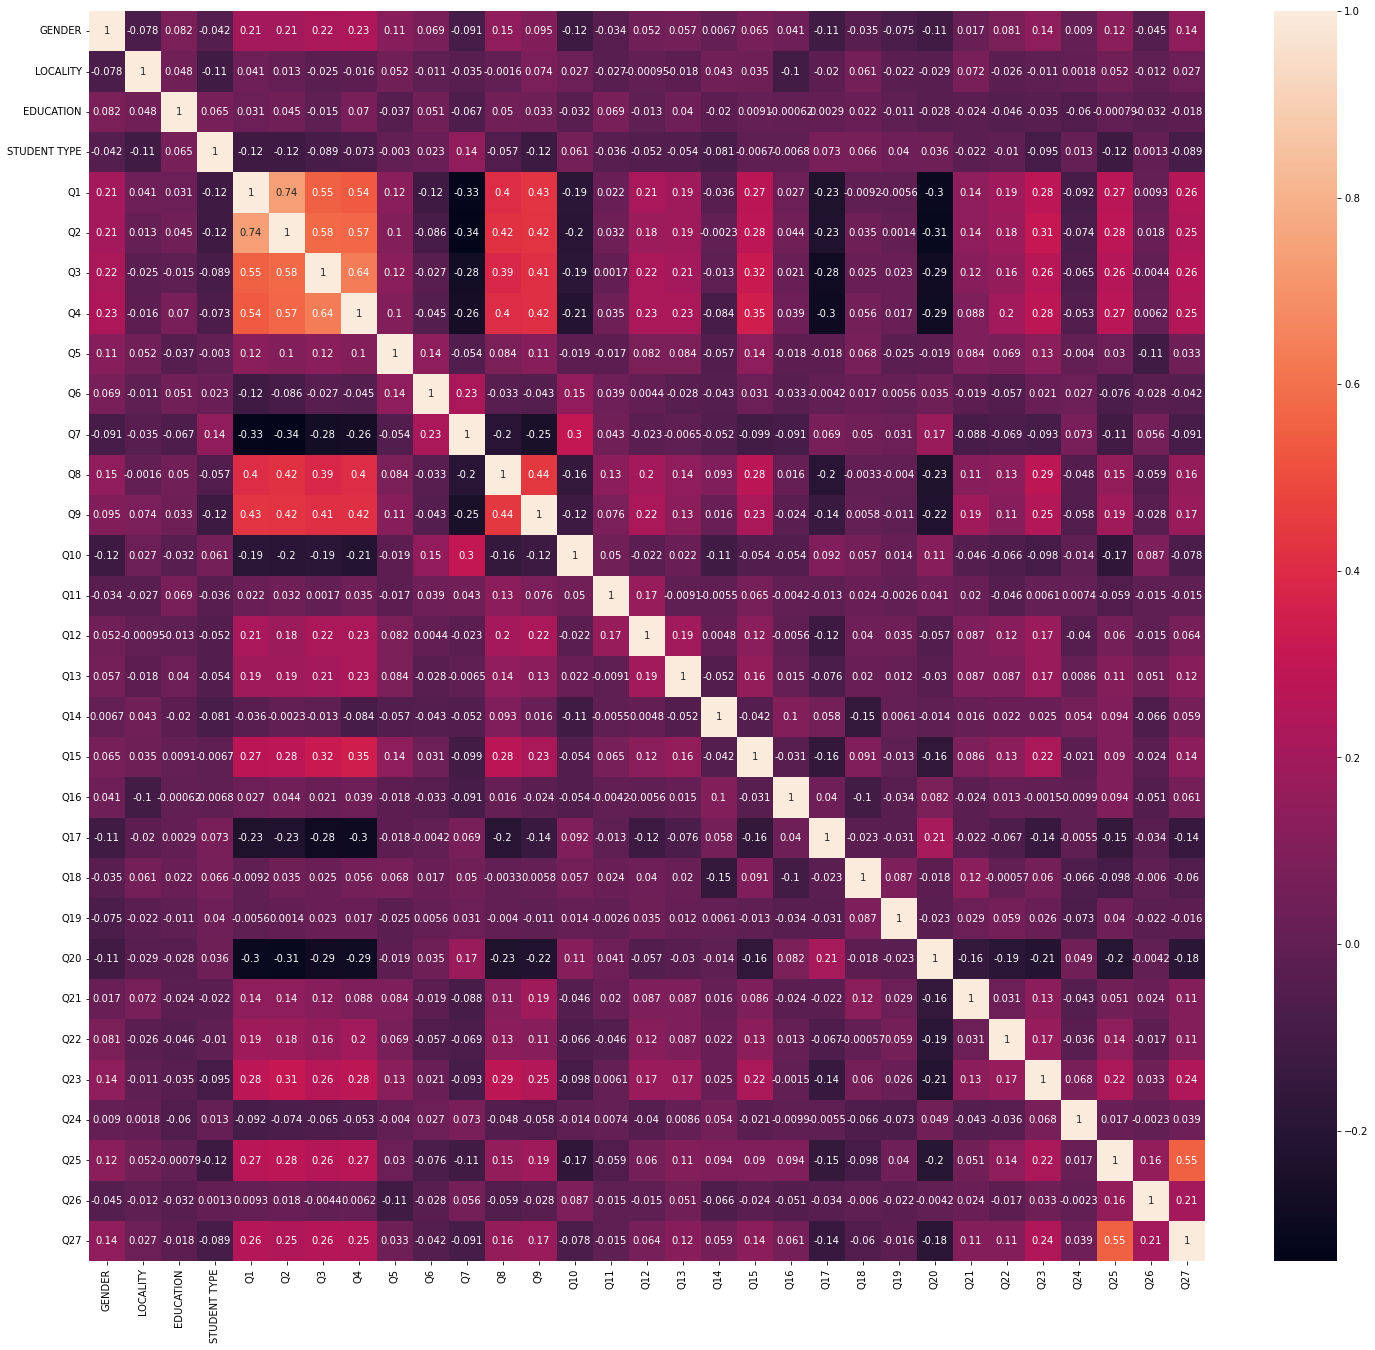

In [34]:
plt.figure(figsize=(25,23))
sns.heatmap(corr,annot=True)

In [37]:
X

,GENDER,LOCALITY,EDUCATION,STUDENT TYPE,Q1,Q2,Q3,Q4,Q5,Q6,...,DEPARTMENT_Law,DEPARTMENT_MBBS,DEPARTMENT_Mathematics and Statistics,DEPARTMENT_Mechanical Engineering,DEPARTMENT_Medical Biochemistry,DEPARTMENT_Optometry,DEPARTMENT_Paramedical Sciences,DEPARTMENT_Pharmacy,DEPARTMENT_Physics,DEPARTMENT_Physiotherapy
0,0,0,1,1,3,4,3,4,1,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,1,1,2,2,3,4,1,3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,1,3,3,2,4,2,2,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1,2,2,2,3,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,2,2,2,2,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,3,3,4,4,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
996,1,0,0,1,3,4,4,5,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,1,0,0,1,2,2,2,3,1,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0,0,0,1,2,1,2,2,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y=df['GENDER']
y.head()

0    0
1    1
2    0
3    0
4    0
Name: GENDER, dtype: int64

# Dividing the dataset into training and testing

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(800, 68)
(800,)
(200, 68)
(200,)


# Fitting the model

In [43]:
#applying GridSearchCV
parameters = [{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100],
               'kernel': ['linear']},
              {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100],
               'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]},
              {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100],
               'kernel': ['poly'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]}]

search=GridSearchCV(svc,parameters,cv=5)
search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'),
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                                100],
                          'kernel': ['linear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                                100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                          'kernel': ['rbf']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                                100],
                          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
                          'kernel': ['poly']}])

In [44]:
search.best_score_

0.9974999999999999

In [45]:
search.best_params_

{'C': 1, 'kernel': 'linear'}

In [46]:
# Initialize and fit SVM model
svc = SVC(C= 1, kernel= 'linear')
svc.fit(x_train, y_train)

SVC(C=1, kernel='linear')

In [49]:
y_pred_test=svc.predict(x_test)
score=accuracy_score(y_test,y_pred_test)
score * 100

100.0

In [50]:
y_pred_train=svc.predict(x_train)
score2=accuracy_score(y_train,y_pred_train)
score2*100

100.0

In [51]:
#to see the suuport vectors in the data
svc.support_vectors_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [2., 1., 0., ..., 0., 0., 0.],
       [2., 1., 1., ..., 0., 0., 0.]])

# Evaluation matrix

<AxesSubplot:>

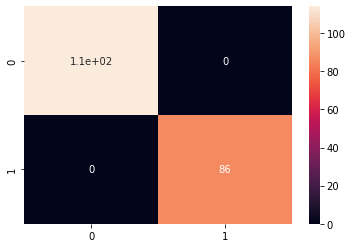

In [53]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True)

In [55]:
#classification report
report=classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       114
           1       1.00      1.00      1.00        86

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

